In [1]:
import numpy as np, os, sys, pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from function import sequence_dataprocess

In [2]:
version_type = 'ver2'
convet_index_dict = {'ver1': 'Integer', 'ver2': 'EIIP', 'ver3': 'Atomic', 'ver4': 'Voss'}

nas_path = "./dataset_1401/"
filter_csv_1000 = pd.read_csv('./dataset_1401/ver1 to ver3  boruta choose 1000 position summary upate  ver2 20220531.csv')
selection_filter = sorted(np.array(filter_csv_1000[version_type]-1)) #python list index start from 0
lineage_label = np.array(pd.read_csv('./dataset_1401/1404_lineage_report and metadata 20220316.csv')[['lineage_x','diff']])
fasta_data_path = './dataset_1401/1404.sequences.aln.fasta'

In [3]:
seq_pro = sequence_dataprocess(gene_list='-NACGT')
seq_data, seq_data_filter, class_name, num_class = seq_pro.dataframe_dataloader(fasta_data_path, lineage_label, selection_filter)
# convert_seq = seq_pro.convert_gene_index(seq_data)
convert_seq_filter = seq_pro.convert_gene_index(seq_data_filter)
# convert_seq = seq_pro.gene_index_remaker(convert_seq, c_type='Integer')
convert_seq_filter = seq_pro.gene_index_remaker(convert_seq_filter, c_type=convet_index_dict[version_type])

filter sample: 1135
-----sample len-----
total sequence shape 29903   ||   filter sequence shape 1000
-----class name-----
{'N': 0, 'Y': 1}
{'-': 0, 'N': 1, 'A': 2, 'C': 3, 'G': 4, 'T': 5}


  0%|          | 0/1135 [00:00<?, ?it/s]

  0%|          | 0/1135 [00:00<?, ?it/s]

In [4]:
if (np.max(convert_seq_filter) > 1) == True:
    print('dfsdf')

In [5]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.manifold import TSNE
from tqdm.notebook import tqdm
ln = LogScaler()
X_train_norm = ln.fit_transform(convert_seq_filter)

tsne = TSNE(n_components=2, perplexity=50, metric='cosine',
            random_state=1701, n_jobs=-1)
            
it =  ImageTransformer(feature_extractor=tsne, pixels=100)
X_train_img = it.fit_transform(X_train_norm)

/home/john/anaconda3/envs/deepinsight/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/john/anaconda3/envs/deepinsight/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/john/anaconda3/envs/deepinsight/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


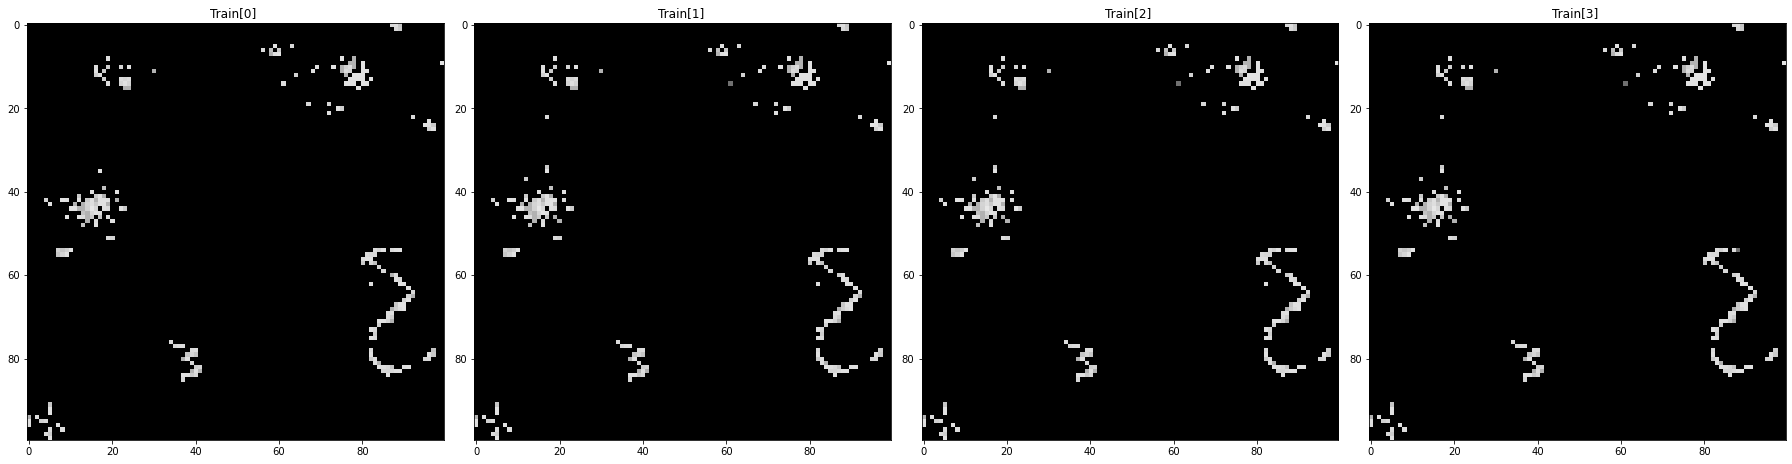

In [6]:
import pickle as pk, os
save_model_path = './deepinsight_location_npy/'
if os.path.exists(save_model_path)==False:
    os.mkdir('./deepinsight_location_npy/')
save_name = f'tsne-binary-perplexity=50-pixel=100[{convet_index_dict[version_type]}].pkl'
# it = pk.load(open("./deepinsight_location_npy/tsne-binary-perplexity=50-pixel=400[onehot].pkl",'rb'))
pk.dump(it, open(os.path.join(save_model_path, save_name),"wb"))
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 4, figsize=(25, 7))
for i in range(0,4):
    ax[i].imshow(X_train_img[i])
    ax[i].title.set_text("Train[{}] ".format(i))
plt.tight_layout()
plt.savefig(f'./deepinsight_location_npy/tsne-binary-perplexity=50-pixel=100[{convet_index_dict[version_type]}].jpg')

In [7]:
# save DeepInSight numpy list
# multiclass_nactg multiclass_totalunit
save_path = f'./np_image_totalunit/tsne-binary-perplexity=5-pixel=100[{convet_index_dict[version_type]}]/'
if not os.path.exists(save_path):
    os.mkdir(save_path)
if not os.path.exists(os.path.join(save_path,'image_npy')):
    os.mkdir(os.path.join(save_path,'image_npy'))

np.save(f'{save_path}/label.npy',num_class)
for idx, image in enumerate(X_train_img):
    if (idx)<10:
        np.save(f"{save_path}/image_npy/000{idx}.npy", image)
    elif (idx)<100:
        np.save(f"{save_path}/image_npy/00{idx}.npy", image)
    elif (idx)<1000:
        np.save(f"{save_path}/image_npy/0{idx}.npy", image)
    else:
        np.save(f"{save_path}/image_npy/{idx}.npy", image)
        
# save MLP numpy list
save_path = f'./np_image_totalunit/mlp_{convet_index_dict[version_type]}'
if not os.path.exists(save_path):
    os.mkdir(save_path)
np.save(os.path.join(save_path, 'label.npy'), num_class)
np.save(os.path.join(save_path, 'gene.npy'), X_train_norm)
